In [1]:
import numpy as np
import tensorflow as tf

#corpus_raw = "He is the king. The king is royal. She is the royal queen"
corpus_raw = "We are in machine learning group. Machine learning group is in school of computing. The School of computing is a computer science school in UEF. The campus of UEF is in Joensuu."
corpus_raw = corpus_raw.lower()
corpus_raw2 = corpus_raw

corpus_raw2= corpus_raw2.replace('.',"")
print(corpus_raw2)

words = []

for word in corpus_raw2.split():
    print (word)
    if word != '.':
        words.append(word)
    else :
        print ('true')

#words = words.replace('.',"")
words = set(words)



we are in machine learning group machine learning group is in school of computing the school of computing is a computer science school in uef the campus of uef is in joensuu
we
are
in
machine
learning
group
machine
learning
group
is
in
school
of
computing
the
school
of
computing
is
a
computer
science
school
in
uef
the
campus
of
uef
is
in
joensuu


In [2]:
word2int ={}
int2word ={}

vocab_size = len(words)

print (vocab_size)

for i, word in enumerate(words):
    print(i, word)
    word2int[word] =i
    int2word[i] = word

#print(word2int['queen'])


raw_sentences = corpus_raw.split('.')
print (raw_sentences)

sentences =[]
for sentence in raw_sentences:
    sentences.append(sentence.split())

print(sentences)





17
0 a
1 machine
2 are
3 the
4 computer
5 we
6 uef
7 campus
8 in
9 computing
10 joensuu
11 school
12 group
13 is
14 learning
15 science
16 of
['we are in machine learning group', ' machine learning group is in school of computing', ' the school of computing is a computer science school in uef', ' the campus of uef is in joensuu', '']
[['we', 'are', 'in', 'machine', 'learning', 'group'], ['machine', 'learning', 'group', 'is', 'in', 'school', 'of', 'computing'], ['the', 'school', 'of', 'computing', 'is', 'a', 'computer', 'science', 'school', 'in', 'uef'], ['the', 'campus', 'of', 'uef', 'is', 'in', 'joensuu'], []]


In [3]:
data =[]
WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE,0): min(word_index + WINDOW_SIZE, len(sentence)) + 1]:
            if nb_word != word:
                data.append([word,nb_word])

print (data)

def to_one_hot(data_point_index, vocab_size):
    temp= np.zeros(vocab_size)
    temp[data_point_index]=1
    return temp

x_train =[]
y_train =[]

for data_word in data:
    x_train.append(to_one_hot(word2int[data_word[0]],vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1]],vocab_size))

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train, y_train)

print (x_train.shape, y_train.shape)



[['we', 'are'], ['we', 'in'], ['are', 'we'], ['are', 'in'], ['are', 'machine'], ['in', 'we'], ['in', 'are'], ['in', 'machine'], ['in', 'learning'], ['machine', 'are'], ['machine', 'in'], ['machine', 'learning'], ['machine', 'group'], ['learning', 'in'], ['learning', 'machine'], ['learning', 'group'], ['group', 'machine'], ['group', 'learning'], ['machine', 'learning'], ['machine', 'group'], ['learning', 'machine'], ['learning', 'group'], ['learning', 'is'], ['group', 'machine'], ['group', 'learning'], ['group', 'is'], ['group', 'in'], ['is', 'learning'], ['is', 'group'], ['is', 'in'], ['is', 'school'], ['in', 'group'], ['in', 'is'], ['in', 'school'], ['in', 'of'], ['school', 'is'], ['school', 'in'], ['school', 'of'], ['school', 'computing'], ['of', 'in'], ['of', 'school'], ['of', 'computing'], ['computing', 'school'], ['computing', 'of'], ['the', 'school'], ['the', 'of'], ['school', 'the'], ['school', 'of'], ['school', 'computing'], ['of', 'the'], ['of', 'school'], ['of', 'computing'],

In [28]:
x = tf.placeholder(tf.float32, shape = (None, vocab_size))
y_label = tf.placeholder(tf.float32, shape = (None, vocab_size))

#sess2 = tf.InteractiveSession()

EMBEDDING_DIM = 5

W1 = tf.Variable(tf.random_normal([vocab_size,EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))

#tf.Print (W1,[W1])
#tf.Print (b1,[b1])

hidden_representation = tf.add(tf.matmul(x,W1),b1)

#

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM,vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2),b2))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(W1))
print(sess.run(b1))

#print(sess.run(hidden_representation))

print(sess.run(W2))
print(sess.run(b2))

#tm= tf.add(tf.matmul(hidden_representation, W2),b2)
#print(sess.run(tm))
#pred = tf.nn.softmax(tm)
print((prediction))

cross_entropy_loss = tf.reduce_mean(- tf.reduce_sum(y_label * tf.log(prediction), reduction_indices = [1]))
#print(sess.run(cross_entropy_loss))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 10

for _ in range (n_iters):
    sess.run(train_step, feed_dict = {x:x_train, y_label:y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict= {x:x_train, y_label:y_train}))


print(sess.run(W1))
print(sess.run(b1))

vectors = sess.run(W1+b1)

print (vectors)

print (vectors[word2int['school']])

[[-0.90539587  1.3621744   0.5660251  -0.15759684 -0.8262558 ]
 [-1.0209912   0.93073595 -0.35726613 -1.6683906  -1.9246007 ]
 [-0.1490388  -0.08860212 -0.40857008  0.17801936 -1.0575674 ]
 [ 1.2584777  -1.3237897   0.11202912  1.3168924   0.9831582 ]
 [ 3.0177658  -0.3737824  -1.127723   -1.3478844   0.24365328]
 [ 2.0878909   0.20041615  0.6167537   0.6629892   2.3143952 ]
 [-0.14151177 -0.80330545 -0.21123928 -1.1790253   0.03284884]
 [ 0.539487    1.212395    0.403642    1.5970558  -0.47758824]
 [ 0.5205614   2.2844124  -1.366578   -0.2373876   0.57463366]
 [ 3.7111514   0.815574    0.06330846 -0.5888243   1.2415694 ]
 [ 0.03146185 -1.4856592   1.1336617   0.6136821  -0.0617773 ]
 [-0.4206859   0.14444557  0.76037586 -0.9725404  -1.958741  ]
 [-1.5086796  -1.3853263   0.6586033   0.7736675   1.0269285 ]
 [-0.17357947  1.1148919   0.17835882  1.3033664  -0.25486305]
 [ 0.02459823 -0.01899356 -1.7448742  -1.7129778   0.41255426]
 [-1.3737478  -0.5863107  -0.03700965  1.3003745   0.70

In [29]:
print (vectors)

[[-1.4650574   1.9339695  -0.37772208 -0.51204455 -0.39676082]
 [-1.5982208   1.5766201  -1.2830157  -2.0177655  -1.4507227 ]
 [-0.81343657  0.511662   -1.298635   -0.20002644 -0.57271975]
 [ 0.6076741  -0.74502295 -0.80292886  0.96031946  1.4308746 ]
 [ 2.3384178   0.19019309 -2.0203023  -1.6518376   0.6860471 ]
 [ 1.4208605   0.7870877  -0.3071198   0.26209354  2.7651873 ]
 [-0.76959753 -0.20490831 -1.1252187  -1.456507    0.47977513]
 [-0.09701657  1.8025916  -0.5279809   1.2393653  -0.03016645]
 [-0.20554423  2.7051392  -2.2635212  -0.4439856   1.0245588 ]
 [ 3.0116632   1.320154   -0.8284419  -0.862001    1.6826615 ]
 [-0.6053749  -0.88161105  0.2106052   0.23798788  0.37340677]
 [-0.9767261   0.75249785 -0.14888358 -1.1872373  -1.4847343 ]
 [-2.0428948  -0.7952798  -0.31972748  0.3709609   1.4066262 ]
 [-0.6143092   1.6104946  -0.79306936  0.92594606  0.13051641]
 [-0.66746455  0.64069057 -2.60925    -2.0279536   0.9029337 ]
 [-1.90333    -0.04859865 -1.0078185   0.93753165  1.09

In [34]:
np.savetxt("myvectors.txt", vectors)

In [35]:
y = np.loadtxt("myvectors.txt")

In [36]:
print (y[word2int['school']])

[-0.97672611  0.75249785 -0.14888358 -1.18723726 -1.4847343 ]


In [33]:
print (vectors[word2int['school']])

[-0.9767261   0.75249785 -0.14888358 -1.1872373  -1.4847343 ]


group
is
we
a 0.22120221595716374
machine 0.9161398165577012
are -0.46312807509274795
the -0.15657729265613732
computer 0.970804773340649
we 0.9949678502159615
uef 0.15784838811097154
campus 0.6008293367782728
in -0.13567740676920315
computing -0.9385368351616304
joensuu 0.24860686664051637
school -0.650773310371467
group -0.5394836877096498
is -0.9706256111757875
learning 0.6915203626461481
science 0.9245590243842509
of -0.9127988618354683


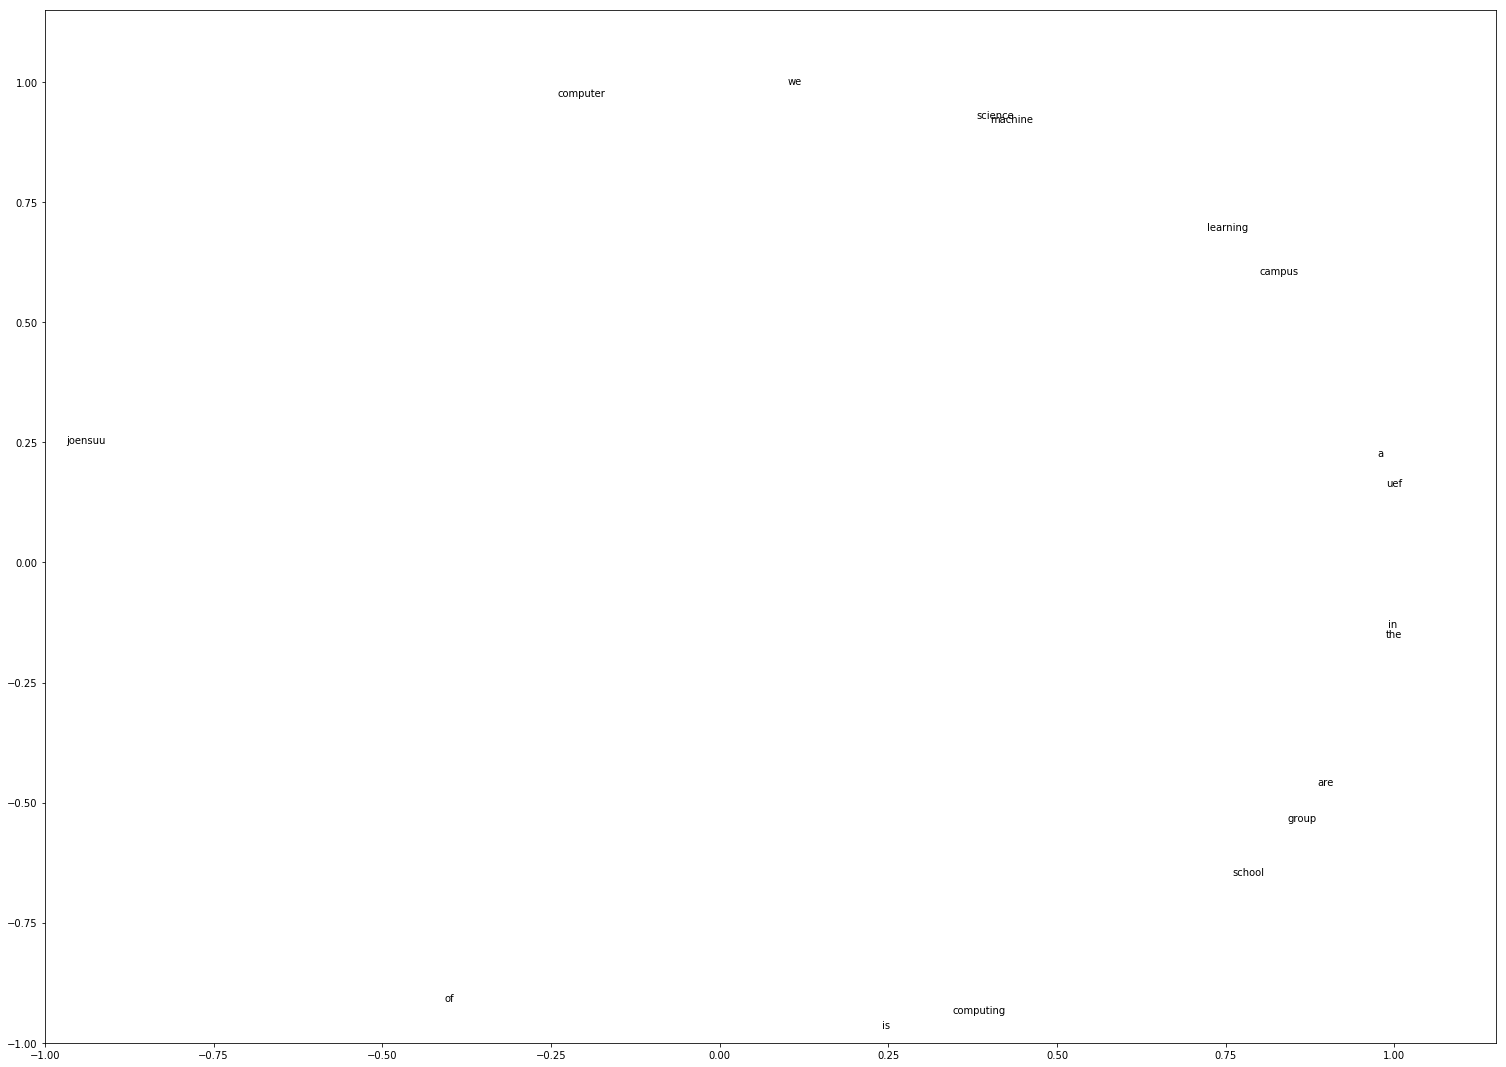

In [14]:

def euclidean_dist(vec1,vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 100000
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector)< min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

print(int2word[find_closest(word2int['school'],vectors)])
print(int2word[find_closest(word2int['computing'],vectors)])
print(int2word[find_closest(word2int['computer'],vectors)])


from sklearn.manifold import TSNE

model = TSNE(n_components =2, random_state =0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors,'l2')

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [26,19]
fig, ax = plt.subplots()

#plt.xlim(-0.0003,0.0003)
#plt.ylim(-0.0003,0.0003)
plt.xlim(-1,1.15)
plt.ylim(-1,1.15)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word,(vectors[word2int[word]][0],vectors[word2int[word]][1]))
plt.show()
